## Get data

In [142]:
# Only use full for Google colab
#!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip


## Explore Data

In [143]:
import pandas as pd
df_train = pd.read_csv("../data/nlp_getting_started/train.csv")
df_test = pd.read_csv("../data/nlp_getting_started/test.csv")
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [144]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [145]:
# percentage of samples in training and test set
print(f"Percentage of samples in training set: {len(df_train)/(len(df_train)+len(df_test))*100:.2f}%")
print(f"Percentage of samples in test set: {len(df_test)/(len(df_train)+len(df_test))*100:.2f}%")

Percentage of samples in training set: 70.00%
Percentage of samples in test set: 30.00%


In [146]:
# Shuffle training dataframe
df_train_shuffled = df_train.sample(frac=1, random_state=42)
df_train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [147]:
# unique labels and their counts
print(df_train_shuffled["target"].value_counts())

# what is the percentage of disaster tweets
print("percentage of disaster tweets : ", round(len(df_train_shuffled[df_train_shuffled["target"] == 1]) / len(df_train_shuffled) * 100, 2), "%")

# what is the percentage of non-disaster tweets
print("percentage of non - disaster tweets : ", round(len(df_train_shuffled[df_train_shuffled["target"] == 0]) / len(df_train_shuffled) * 100, 2), "%")


0    4342
1    3271
Name: target, dtype: int64
percentage of disaster tweets :  42.97 %
percentage of non - disaster tweets :  57.03 %


In [148]:
# count of samples in each split
len(df_train_shuffled), len(df_test)

(7613, 3263)

In [149]:
# Visualize random training examples
import random
random_index = random.randint(0, len(df_train_shuffled) - 5) # create random indexes not exceeding length of dataframe
for row in df_train_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
    _,current_text, current_target = row
    print(f"Target: {current_target}", "(real disaster)" if current_target > 0 else "(not real disaster)")
    print(f"Text:\n{current_text}\n")
    print("---\n")

Target: 1 (real disaster)
Text:
LLF TALK  WORLD NEWS U.S. in record hurricane drought - The United States hasn't been hit by a major hurricane in ... http://t.co/ML8IrhWg7O

---

Target: 0 (not real disaster)
Text:
USW: 'The damage from abandoning the deal could well create a new level of uncertainty...economic upheaval &amp; military unrest'

---

Target: 0 (not real disaster)
Text:
I blew up snapchat for no reason ??

---

Target: 0 (not real disaster)
Text:
If the Taken movies took place in India 2 (Vine by @JusReign) https://t.co/hxM8C8e33D

---

Target: 0 (not real disaster)
Text:
@noahshack he's hot &amp; he can sing I'm screaming??????

---



## split the data

In [150]:
# split data into training and validation sets
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df_train_shuffled["text"].to_numpy(),
                                                                            df_train_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)

# check the number of samples in training and validation sets
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [151]:
# check the percentage of disaster and non-disaster tweets in training and validation sets
print("percentage of disaster tweets in training set : ", round(len(train_labels[train_labels == 1]) / len(train_labels) * 100, 2), "%")
print("percentage of non-disaster tweets in training set : ", round(len(train_labels[train_labels == 0]) / len(train_labels) * 100, 2), "%")
print("percentage of disaster tweets in validation set : ", round(len(val_labels[val_labels == 1]) / len(val_labels) * 100, 2), "%")
print("percentage of non-disaster tweets in validation set : ", round(len(val_labels[val_labels == 0]) / len(val_labels) * 100, 2), "%")

percentage of disaster tweets in training set :  42.67 %
percentage of non-disaster tweets in training set :  57.33 %
percentage of disaster tweets in validation set :  45.67 %
percentage of non-disaster tweets in validation set :  54.33 %


In [152]:
# check the first 10 samples in training sentences and labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [153]:
# check the first 10 samples in validation sentences and labels
val_sentences[:10], val_labels[:10]

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
        'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
        'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
        "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over so

In [154]:
# check the percentage of samples in training, validation and test sets of the original dataframe

print("percentage of samples in training set : ", round(len(train_sentences) / (len(df_train_shuffled)+len(df_test)) * 100, 2), "%")
print("percentage of samples in validation set : ", round(len(val_sentences) / (len(df_train_shuffled)+len(df_test)) * 100, 2), "%")
print("percentage of samples in test set : ", round(len(df_test) / (len(df_train_shuffled)+len(df_test)) * 100, 2), "%")


percentage of samples in training set :  62.99 %
percentage of samples in validation set :  7.01 %
percentage of samples in test set :  30.0 %


## Tokenization / Embedding of text

* Tokenization : Direct mapping of token to number

* Embedding - create a feature vector for a token

### Tokenizing

In [155]:
# Get average number of tokens (words) in all training sentences
def avg_word_length(sentences):
    """
    Returns the average number of words per sentence.
    """
    return round(sum([len(i.split()) for i in sentences]) / len(sentences))



# Get the average word length in training set
train_avg_word_len = avg_word_length(train_sentences)

# Get the average word length in validation set
val_avg_word_len = avg_word_length(val_sentences)

# Get the average word length in test set
test_avg_word_len = avg_word_length(df_test["text"])


train_avg_word_len, val_avg_word_len, test_avg_word_len



(15, 15, 15)

In [156]:
# tokenize text using tensorflow layer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

#create TextVectorization object
text_vectorizer = TextVectorization(max_tokens=10000, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=15, # how long should the output sequence of tokens be
                                    pad_to_max_tokens=True) # whether to pad sequences to the longest sequence or not

                                    


In [157]:
# set text_vectorizer variables on training text
text_vectorizer.adapt(train_sentences)


In [158]:
# create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [159]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Block the plate with a charging Schwarber coming down the line Cervelli. I dare you. You would explode into a little puff of smoke        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1549,    2, 2798,   14,    3, 2161, 4678,  249,  134,    2,  648,
           1,    8, 2503,   12]])>

In [160]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")


Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Embedding

In [161]:
# Creating an Embedding using an Embedding Layer
from tensorflow.keras.layers import Embedding

# create an embedding layer
embedding = Embedding(input_dim=10000, # size of our vocabulary
                        output_dim=128, # set the size of the embedding vector
                        embeddings_initializer="uniform", # default, initialize embedding layer
                        input_length=15) # how long is each input sentence

# get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nEmbedded version:")
# embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed


Original text:
The only country claiming the moral high ground is the only one to have dropped atomic bombs. #Hiroshima #BanTheBomb
http://t.co/6G49ywwsQJ        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00199076, -0.02351836,  0.04412159, ..., -0.01109869,
         -0.03960495, -0.04315636],
        [ 0.04688287,  0.02921085, -0.04422367, ..., -0.02784988,
          0.00782899, -0.0254053 ],
        [-0.02668618, -0.0380115 ,  0.018964  , ..., -0.01030532,
          0.00437386,  0.00682341],
        ...,
        [-0.02992374, -0.0080337 ,  0.0444865 , ...,  0.03880921,
         -0.02025818, -0.00716957],
        [-0.04967885, -0.03827131,  0.04515162, ..., -0.01479734,
         -0.00293178,  0.01062806],
        [-0.0315498 , -0.01945461,  0.02477126, ..., -0.0260766 ,
          0.01663757,  0.04004538]]], dtype=float32)>

## Classificaton Model ( Disaster / Not Disaster)

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

### Model 0: Naive Bayes (baseline)

In [162]:
# Define the model 0 by using sci-kit learn API
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()), # convert words to numbers using tf-idf
    ("clf", MultinomialNB()) # model the text
])

# fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

# evaluate the baseline model on validation set
model_0.score(val_sentences, val_labels)


0.7926509186351706

In [163]:
y_preds = model_0.predict(val_sentences)

# get accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.
    """
    # calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) 
    # calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy*100,
                    "precision": model_precision*100,
                    "recall": model_recall*100,
                    "f1": model_f1*100}
    return model_results

baseline_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
baseline_results    

{'accuracy': 79.26509186351706,
 'precision': 81.11390004213173,
 'recall': 79.26509186351706,
 'f1': 78.6218975804955}

### Model 1: Feed-forward neural network

In [164]:
# define model 1 using tensorflow API feed-forward neural network (dense model)
from tensorflow.keras import layers

# create a model using the functional API
model_1 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.GlobalAveragePooling1D(), # condense the feature vector for each token to one vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_1_dense")

model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_6 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_9   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,288,321
Trainable params: 1,288,321
N

In [165]:
from helper_functions import prepare_tb_call_back
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_1_history = model_1.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_1_dense")])


Saving TensorBoard log files to:  running_logs/model_1_dense/20230718-132656
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.5504 - accuracy: 0.7208 - val_loss: 0.4654 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3352 - accuracy: 0.8613 - val_loss: 0.4680 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2314 - accuracy: 0.9096 - val_loss: 0.5697 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1708 - accuracy: 0.9378 - val_loss: 0.6074 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1300 - accuracy: 0.9524 - val_loss: 0.6705 - val_accuracy: 0.7756


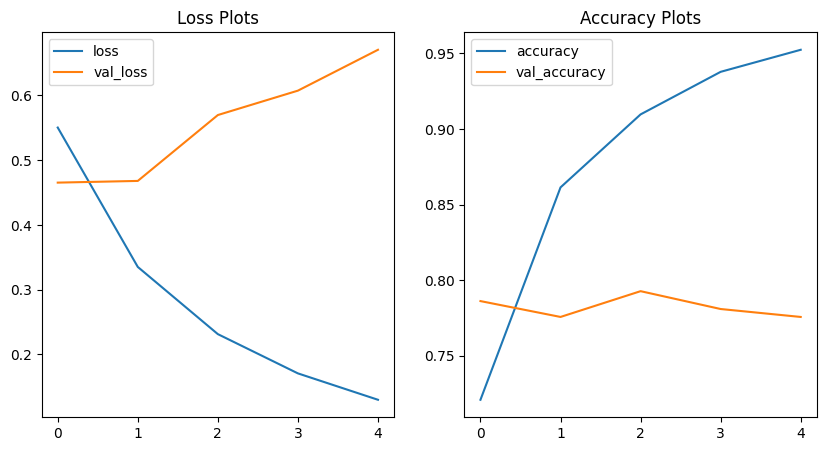

In [166]:
from helper_functions import plot_model_hist
plot_model_hist(model_1_history)

In [167]:
y_pred_probs = model_1.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_1_results  

{'accuracy': 77.55905511811024,
 'precision': 77.58405894864461,
 'recall': 77.55905511811024,
 'f1': 77.44092523940911}

### Model 2: LSTM model

In [168]:
# define model 2 using tensorflow API LSTM model
from tensorflow.keras import layers

# create a model using the functional API
model_2 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.LSTM(64, return_sequences=True), # return sequences since we are using another LSTM layer
    layers.LSTM(64), # return a single vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_2_LSTM")

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_6 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_6 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                      

In [169]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_2_history = model_2.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_2_LSTM")])


Saving TensorBoard log files to:  running_logs/model_2_LSTM/20230718-132706
Epoch 1/5
215/215 [==============================] - 9s 28ms/step - loss: 0.1774 - accuracy: 0.9439 - val_loss: 0.7491 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0991 - accuracy: 0.9615 - val_loss: 0.8843 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0814 - accuracy: 0.9657 - val_loss: 0.9729 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0629 - accuracy: 0.9727 - val_loss: 1.4940 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0627 - accuracy: 0.9733 - val_loss: 1.2111 - val_accuracy: 0.7585


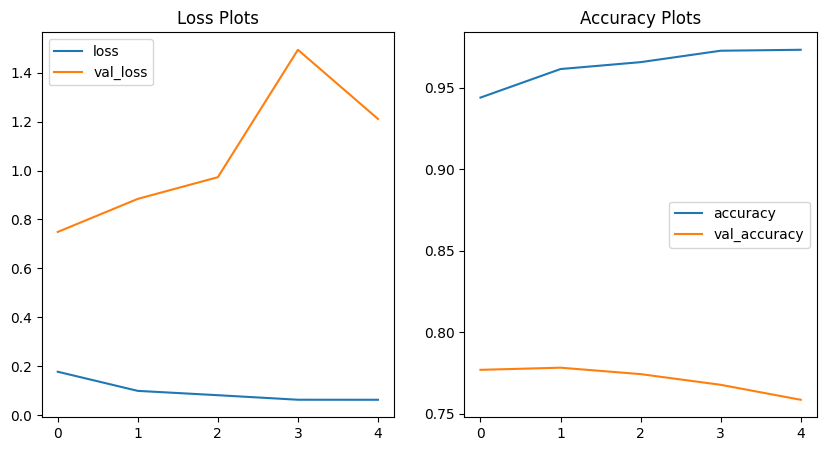

In [170]:
# plot the model history
plot_model_hist(model_2_history)

In [171]:
# make predictions
y_pred_probs = model_2.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds) 
model_2_results                                    

{'accuracy': 75.8530183727034,
 'precision': 75.84850115306213,
 'recall': 75.8530183727034,
 'f1': 75.73131746360092}

### Model 3: GRU model

In [172]:
# define model 3 using tensorflow API GRU model
from tensorflow.keras import layers

# create a model using the functional API
model_3 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.GRU(64, return_sequences=True), # return sequences since we are using another LSTM layer
    layers.GRU(64), # return a single vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_3_GRU")

model_3.summary()


Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_6 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 15, 64)            37248     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                       

In [173]:
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_3_history = model_3.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_3_GRU")])


Saving TensorBoard log files to:  running_logs/model_3_GRU/20230718-132736
Epoch 1/5
215/215 [==============================] - 10s 27ms/step - loss: 0.1480 - accuracy: 0.9476 - val_loss: 0.7460 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0712 - accuracy: 0.9730 - val_loss: 1.1984 - val_accuracy: 0.7467
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0597 - accuracy: 0.9758 - val_loss: 1.5207 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0470 - accuracy: 0.9769 - val_loss: 1.3711 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0500 - accuracy: 0.9774 - val_loss: 1.2237 - val_accuracy: 0.7493


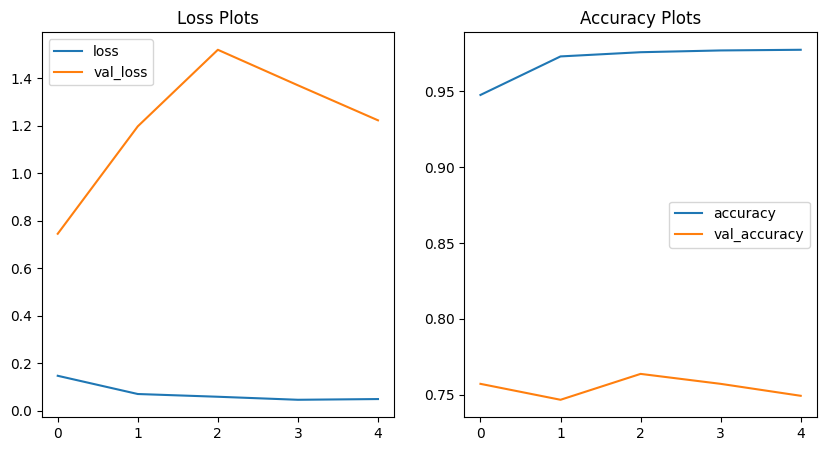

In [174]:
# plot the model history
plot_model_hist(model_3_history)

In [175]:
# make predictions
y_pred_probs = model_3.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_3_results                                    

{'accuracy': 74.93438320209974,
 'precision': 74.95314021551161,
 'recall': 74.93438320209974,
 'f1': 74.942598230625}

### Model 4 : Bi-directional LSTM

In [176]:
# Define model 4 using the tensorflow API Bidirectional LSTM model
from tensorflow.keras import layers

# create a model using the functional API
model_4 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)), # return sequences since we are using another LSTM layer
    layers.Bidirectional(layers.LSTM(64)), # return a single vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_4_bidirectional_LSTM")

model_4.summary()

Model: "model_4_bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_6 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 15, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                        

In [177]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_4_history = model_4.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_4_bidirectional_LSTM")])
                

Saving TensorBoard log files to:  running_logs/model_4_bidirectional_LSTM/20230718-132805
Epoch 1/5
215/215 [==============================] - 14s 38ms/step - loss: 0.0962 - accuracy: 0.9693 - val_loss: 1.2518 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0578 - accuracy: 0.9756 - val_loss: 1.3626 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0455 - accuracy: 0.9791 - val_loss: 1.5295 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0409 - accuracy: 0.9801 - val_loss: 1.8154 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0411 - accuracy: 0.9800 - val_loss: 1.7451 - val_accuracy: 0.7467


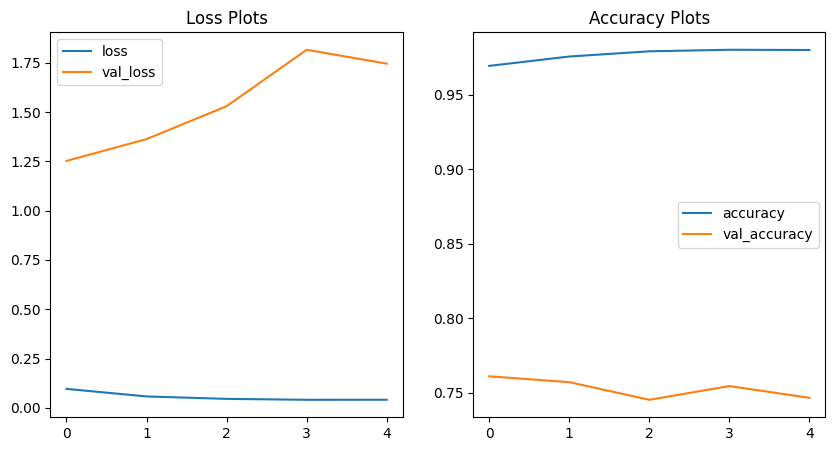

In [178]:
# plot the model history
plot_model_hist(model_4_history)

In [179]:
# make predictions
y_pred_probs = model_4.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_4_results                                    

{'accuracy': 74.67191601049869,
 'precision': 74.90916022390627,
 'recall': 74.67191601049869,
 'f1': 74.35790984470222}

### Model 5: 1D Convolutional Neural Network

In [180]:
# Define model 5 using the tensorflow API 1D Conv1D model
from tensorflow.keras import layers

# create a model using the functional API
model_5 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.Conv1D(64, kernel_size=5, padding="same", activation="relu"), # kernel_size is the number of words to look at
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_5_Conv1D")

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_6 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            41024     
                                                                 
 global_average_pooling1d_10  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 1)              

In [181]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_5_history = model_5.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_5_Conv1D")])
                                        

Saving TensorBoard log files to:  running_logs/model_5_Conv1D/20230718-132852
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.1321 - accuracy: 0.9564 - val_loss: 0.9898 - val_accuracy: 0.7507
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0558 - accuracy: 0.9768 - val_loss: 1.1209 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0446 - accuracy: 0.9799 - val_loss: 1.3278 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0385 - accuracy: 0.9806 - val_loss: 1.7211 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0351 - accuracy: 0.9832 - val_loss: 1.7013 - val_accuracy: 0.7415


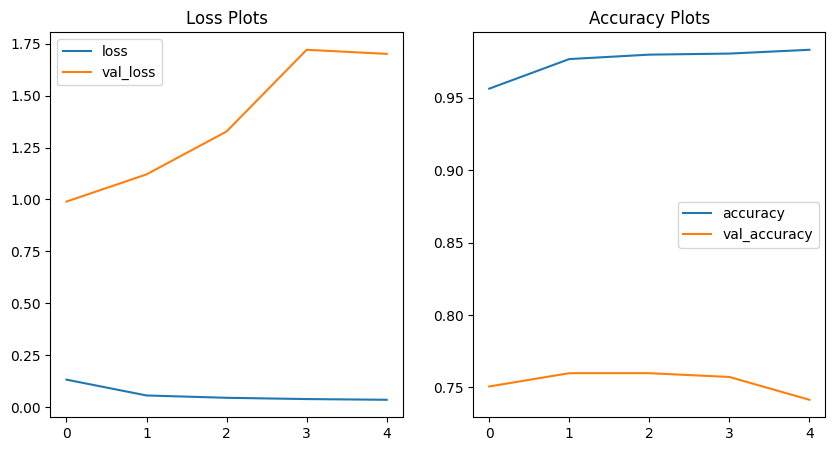

In [182]:
# plot the model history
plot_model_hist(model_5_history)

In [183]:
# make predictions
y_pred_probs = model_5.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_5_results                                    

{'accuracy': 74.1469816272966,
 'precision': 74.1307016009924,
 'recall': 74.1469816272966,
 'f1': 74.13768881121563}

### Model 6: TensorFlow Hub Pretrained Feature Extractor

In [196]:
# Define model 6 using the tensorflow hub pretrained feature extractor
import tensorflow_hub as hub

# define the pretrained embedding layer
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                          input_shape=[], # define input shape
                            dtype=tf.string, # define data type of input
                            trainable=False, # do not train the layer
                            name="universal_sentence_encoder")

# create a model using the functional API
model_6 = tf.keras.Sequential([
    embed, # use the pretrained embedding layer
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_6_TB_HUB")

model_6.summary()

Model: "model_6_TB_HUB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_40 (Dense)            (None, 64)                32832     
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [197]:
# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_6_history = model_6.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_6_USE")])
                                                

Saving TensorBoard log files to:  running_logs/model_6_USE/20230718-133211
Epoch 1/5


215/215 [==============================] - 4s 10ms/step - loss: 0.5083 - accuracy: 0.7758 - val_loss: 0.4544 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4152 - accuracy: 0.8140 - val_loss: 0.4394 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4010 - accuracy: 0.8227 - val_loss: 0.4364 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3919 - accuracy: 0.8269 - val_loss: 0.4291 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3852 - accuracy: 0.8305 - val_loss: 0.4281 - val_accuracy: 0.8163


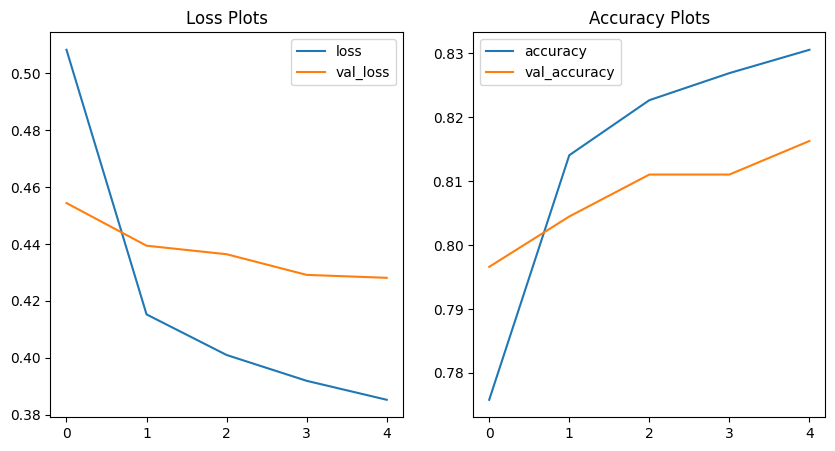

In [198]:
# plot the model history
plot_model_hist(model_6_history)

In [199]:
# make predictions
y_pred_probs = model_6.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_6_results                                    

{'accuracy': 81.62729658792651,
 'precision': 81.94307529740601,
 'recall': 81.62729658792651,
 'f1': 81.45018782850012}

### Model 7: Same as model 6 with 10% of training data

In [188]:
# Define model 7 using the tensorflow hub pretrained feature extractor
import tensorflow_hub as hub

# define the pretrained embedding layer
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                          input_shape=[], # define input shape
                            dtype=tf.string, # define data type of input
                            trainable=False, # do not train the layer
                            name="universal_sentence_encoder")

# create a model using the functional API
model_7 = tf.keras.Sequential([
    embed, # use the pretrained embedding layer
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_7_TB_HUB")

model_7.summary()

Model: "model_7_TB_HUB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_36 (Dense)            (None, 64)                32832     
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [189]:
def get_10_percent(list_data):
  """Gets 10% of the data from a Python list.

  Args:
    list_data: The list of data.

  Returns:
    A list of the first 10% of the data.
  """

  number_of_items = len(list_data)
  number_of_items_to_return = int(number_of_items * 0.1)
  return list_data[:number_of_items_to_return]

In [190]:
# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_7_history = model_7.fit(get_10_percent(train_sentences),
                                get_10_percent(train_labels),
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_7_TB_HUB")])
                                                

Saving TensorBoard log files to:  running_logs/model_7_TB_HUB/20230718-132938
Epoch 1/5
22/22 [==============================] - 3s 32ms/step - loss: 0.6724 - accuracy: 0.6044 - val_loss: 0.6520 - val_accuracy: 0.6378
Epoch 2/5
22/22 [==============================] - 0s 13ms/step - loss: 0.6036 - accuracy: 0.7810 - val_loss: 0.5964 - val_accuracy: 0.7480
Epoch 3/5
22/22 [==============================] - 0s 13ms/step - loss: 0.5302 - accuracy: 0.8131 - val_loss: 0.5405 - val_accuracy: 0.7808
Epoch 4/5
22/22 [==============================] - 0s 15ms/step - loss: 0.4662 - accuracy: 0.8263 - val_loss: 0.5063 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 0s 15ms/step - loss: 0.4240 - accuracy: 0.8263 - val_loss: 0.4891 - val_accuracy: 0.7795


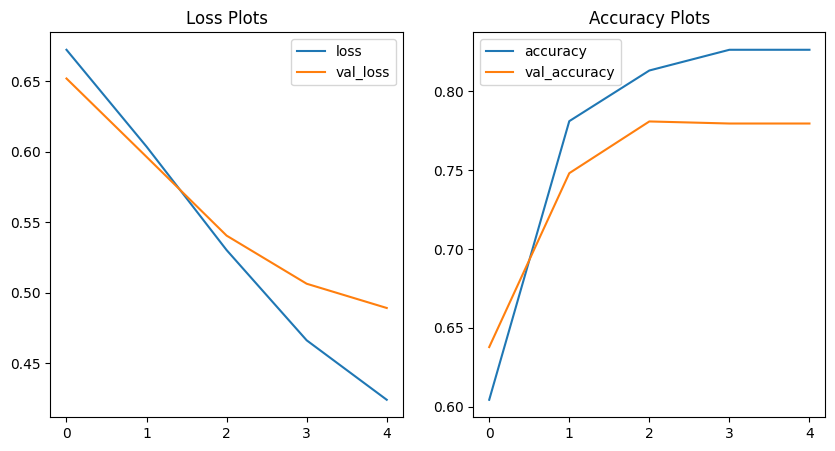

In [191]:
# plot the model history
plot_model_hist(model_7_history)

In [192]:
# make predictions
y_pred_probs = model_7.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_7_results                                    

{'accuracy': 77.95275590551181,
 'precision': 77.97634583030512,
 'recall': 77.95275590551181,
 'f1': 77.84163768415738}

# All model Results

In [200]:
# A dataframe with results of all models
import pandas as pd
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                    "model_1_dense": model_1_results,
                                    "model_2_LSTM": model_2_results,
                                    "model_3_GRU": model_3_results,
                                    "model_4_bidirectional_LSTM": model_4_results,
                                    "model_5_Conv1D": model_5_results,
                                    "model_6_TB_HUB": model_6_results,
                                    "model_7_TB_HUB_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,81.113900,79.265092,78.621898
model_1_dense,77.559055,77.584059,77.559055,77.440925
model_2_LSTM,75.853018,75.848501,75.853018,75.731317
model_3_GRU,74.934383,74.953140,74.934383,74.942598
model_4_bidirectional_LSTM,74.671916,74.909160,74.671916,74.357910
model_5_Conv1D,74.146982,74.130702,74.146982,74.137689
model_6_TB_HUB,81.627297,81.943075,81.627297,81.450188
model_7_TB_HUB_10_percent,77.952756,77.976346,77.952756,77.841638
